In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size':'18'})
rc('text', usetex=True)

In [3]:
som = pd.read_json('som_sss_d18o.json')
data_sil = pd.read_json('./sil_som_format.json')
data_pho = pd.read_json('./pho_som_format.json')
data_nit = pd.read_json('./nit_som_format.json')
data_do = pd.read_json('./do_som_format.json')
data_ep = pd.read_json('./ep_som_format.json')
data_d18op = pd.read_json('./d18op_som_format.json')

In [4]:
sil = np.array([])
pho = np.array([])
nit = np.array([])
do = np.array([])
ep = np.array([])
d18op = np.array([])
lat = np.array([])
lon = np.array([])
for lat_i in range(180):
  for lon_j in range(360):
    sil = np.append(sil,data_sil.loc[lat_i].at[lon_j])
    pho = np.append(pho,data_pho.loc[lat_i].at[lon_j])
    nit = np.append(nit,data_nit.loc[lat_i].at[lon_j])
    do = np.append(do,data_do.loc[lat_i].at[lon_j])
    ep = np.append(ep,data_ep.loc[lat_i].at[lon_j])
    d18op = np.append(d18op,data_d18op.loc[lat_i].at[lon_j])
    lat = np.append(lat,lat_i)
    lon = np.append(lon,lon_j)

In [5]:
som['pho'] = list(pho)
som['sil'] = list(sil)
som['nit'] = list(nit)
som['do'] = list(do)
som['ep'] = list(ep)
som['d18op'] = list(d18op)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [20]:
df_feature_imp = pd.DataFrame(columns=['lat','lon','pho','sil','nit','do','ep','d18op'])
#df_feature_imp = pd.DataFrame(columns=['lat','lon','sil','ep','d18op'])

df_split = np.array_split(som, 6)
i = 0
lon_split = range(30,390,30)
for index,df in enumerate(df_split):
    last_j = 0
    for j in lon_split:        
        df_store = pd.DataFrame(columns=['lat','lon','pho','sil','nit','do','ep','d18op'])
#        df_store = pd.DataFrame(columns=['lat','lon','sil','ep','d18op'])

        df_split2 = df[(df['lon']>=last_j)&(df['lon']<j)]
        bmu = np.array(df_split2['bmu'])
        
        df_store['lat'] = df_split2['lat']
        df_store['lon'] = df_split2['lon']
        
        df_split2 = df_split2.drop(['bmu','lat','lon'], axis = 1)
        if len(df_split2) >0:
          train_features, test_features, train_labels, test_labels = train_test_split(df_split2, bmu, test_size = 0.15)
          rf = RandomForestClassifier(n_estimators = 25)
          rf.fit(train_features, train_labels)
          predictions = rf.predict(test_features)# Calculate the absolute errors
          errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
          imp = rf.feature_importances_        
          df_store['pho'] = [imp[0]]*len(df_store)
          df_store['sil'] = [imp[1]]*len(df_store)
          df_store['nit'] = [imp[2]]*len(df_store)
          df_store['do'] = [imp[3]]*len(df_store)
          df_store['ep'] = [imp[4]]*len(df_store)
          df_store['d18op'] = [imp[5]]*len(df_store)        
          df_feature_imp = df_feature_imp.append(df_store)
        last_j = j

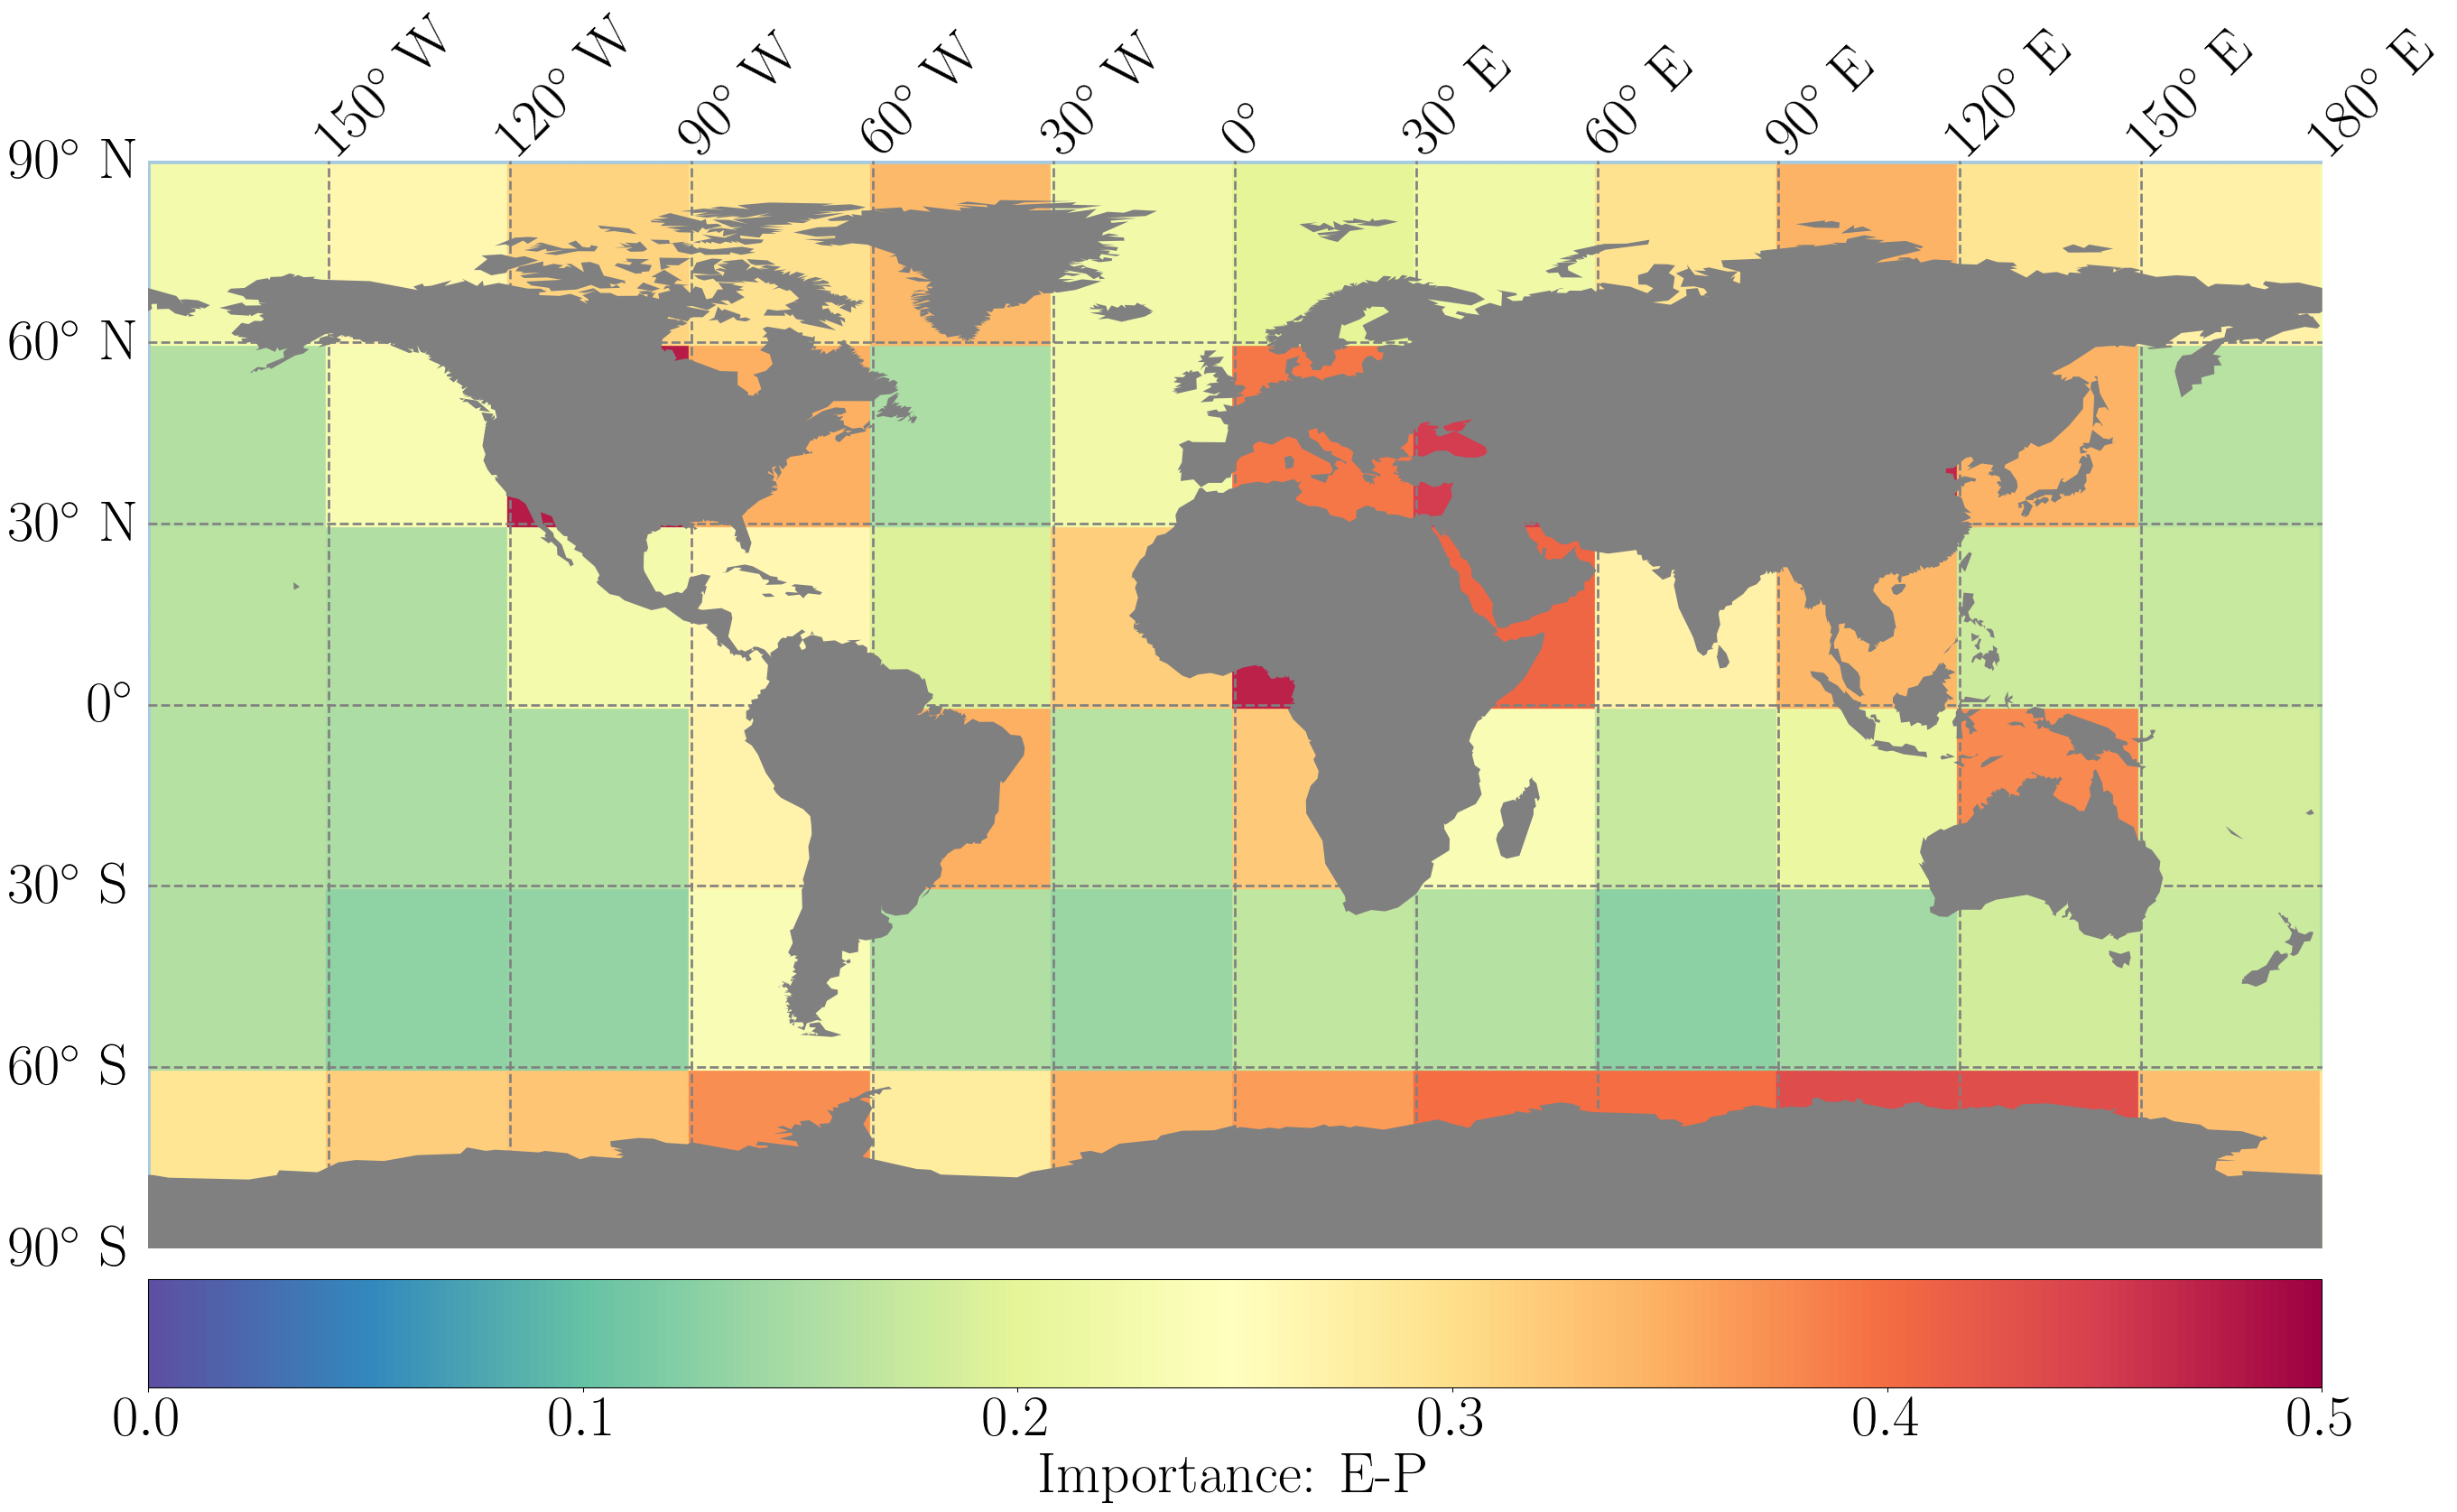

In [21]:
from matplotlib import pyplot as plt
from matplotlib import cm
from global_land_mask import globe
import mpl_toolkits.basemap 
from mpl_toolkits.basemap import Basemap
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size':'18'})
rc('text', usetex=True)

my_dpi=96
plt.figure(figsize=(3600/my_dpi, 1800/my_dpi), dpi=my_dpi)
m=Basemap(projection='cyl',llcrnrlon=-180,urcrnrlon=180, llcrnrlat=-90,urcrnrlat=90,lat_0=0,lon_0=0)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0,zorder=0)
m.drawcoastlines(linewidth=1, color="white",zorder=0)
m.fillcontinents(color='grey', alpha=1, lake_color='grey')

sc = m.scatter(df_feature_imp['lon'],df_feature_imp['lat']-90,s=19, c=df_feature_imp['ep'], cmap="Spectral_r",marker='s',latlon=True)
plt.clim(0,0.5)
cb=plt.colorbar(sc,fraction=0.0886, orientation='horizontal',pad=0.025)
cb.ax.tick_params(labelsize=48)
cb.set_label(label='Importance: E-P',weight='bold',size=48)

plt.axhline(0,color='gray',linewidth=2,linestyle='--')
plt.axhline(30,color='gray',linewidth=2,linestyle='--')
plt.axhline(60,color='gray',linewidth=2,linestyle='--')
plt.axhline(-30,color='gray',linewidth=2,linestyle='--')
plt.axhline(-60,color='gray',linewidth=2,linestyle='--')

plt.axvline(0,color='gray',linewidth=2,linestyle='--')
plt.axvline(30,color='gray',linewidth=2,linestyle='--')
plt.axvline(60,color='gray',linewidth=2,linestyle='--')
plt.axvline(90,color='gray',linewidth=2,linestyle='--')
plt.axvline(120,color='gray',linewidth=2,linestyle='--')
plt.axvline(150,color='gray',linewidth=2,linestyle='--')
plt.axvline(-30,color='gray',linewidth=2,linestyle='--')
plt.axvline(-60,color='gray',linewidth=2,linestyle='--')
plt.axvline(-90,color='gray',linewidth=2,linestyle='--')
plt.axvline(-120,color='gray',linewidth=2,linestyle='--')
plt.axvline(-150,color='gray',linewidth=2,linestyle='--')

plt.text(-190,-3,'0$^\circ$',fontsize=48,fontweight='extra bold')
plt.text(-203,27,'30$^\circ$ N',fontsize=48,fontweight='extra bold')
plt.text(-203,57,'60$^\circ$ N',fontsize=48,fontweight='extra bold')
plt.text(-203,87,'90$^\circ$ N',fontsize=48,fontweight='extra bold')
plt.text(-203,-33,'30$^\circ$ S',fontsize=48,fontweight='extra bold')
plt.text(-203,-63,'60$^\circ$ S',fontsize=48,fontweight='extra bold')
plt.text(-203,-93,'90$^\circ$ S',fontsize=48,fontweight='extra bold')

plt.text(-3,91,'0$^\circ$',fontsize=48,fontweight='extra bold',rotation=45)
plt.text(27,91,'30$^\circ$ E',fontsize=48,fontweight='extra bold',rotation=45)
plt.text(57,91,'60$^\circ$ E',fontsize=48,fontweight='extra bold',rotation=45)
plt.text(87,91,'90$^\circ$ E',fontsize=48,fontweight='extra bold',rotation=45)
plt.text(117,91,'120$^\circ$ E',fontsize=48,fontweight='extra bold',rotation=45)
plt.text(147,91,'150$^\circ$ E',fontsize=48,fontweight='extra bold',rotation=45)
plt.text(177,91,'180$^\circ$ E',fontsize=48,fontweight='extra bold',rotation=45)
plt.text(-33,91,'30$^\circ$ W',fontsize=48,fontweight='extra bold',rotation=45)
plt.text(-63,91,'60$^\circ$ W',fontsize=48,fontweight='extra bold',rotation=45)
plt.text(-93,91,'90$^\circ$ W',fontsize=48,fontweight='extra bold',rotation=45)
plt.text(-123,91,'120$^\circ$ W',fontsize=48,fontweight='extra bold',rotation=45)
plt.text(-153,91,'150$^\circ$ W',fontsize=48,fontweight='extra bold',rotation=45)
plt.savefig('ep_space_importance_by_block.pdf',bbox_inches='tight')